# HW4 Support Vector Machine and Decision Trees

# Due on 11/25 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW3, but will skip the EDA phase we have done enough of it

#### Everything removing outliers, create dummies variables had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

In [4]:
#import the model from sklearn import svm, create the SVC object 
#model = svm.SVC()
#Call Train test split
#print out model performance

In [5]:
# Create SVC object
from sklearn import svm
model = svm.SVC(kernel ='linear')

In [6]:
# Train/test split and train model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1), df['had_affair'], 
                                                    test_size=0.30, random_state=101)
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
#Save model results
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
#Evaluate and print accuracy score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80      1277
           1       0.61      0.25      0.36       633

    accuracy                           0.70      1910
   macro avg       0.66      0.59      0.58      1910
weighted avg       0.68      0.70      0.66      1910

0.6994764397905759


### Question 2. Now try different value of C-parameter and rerun your model

In [8]:
# Recreate SVC object with different C-parameter
model = svm.SVC(kernel ='linear', C=10.0)
# Retrain model
model.fit(X_train,y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
#Save model results
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
#Evaluate and print accuracy score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80      1277
           1       0.61      0.25      0.36       633

    accuracy                           0.70      1910
   macro avg       0.66      0.59      0.58      1910
weighted avg       0.68      0.70      0.66      1910

0.6994764397905759


### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

#### Gamma of 2^-5

In [10]:
# Gamma of 2^-5, C of 1
model = svm.SVC(kernel='rbf', gamma=0.03125, C=1)
# Retrain model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
#Evaluate and print accuracy score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.92      0.80      1277
           1       0.62      0.27      0.38       633

    accuracy                           0.70      1910
   macro avg       0.67      0.59      0.59      1910
weighted avg       0.68      0.70      0.66      1910

0.7026178010471205


In [11]:
# Gamma of 2^-5, C of 10
model = svm.SVC(kernel='rbf', random_state=0, gamma=0.03125, C=10)
# Retrain model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
#Evaluate and print accuracy score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      1277
           1       0.60      0.31      0.41       633

    accuracy                           0.70      1910
   macro avg       0.66      0.60      0.60      1910
weighted avg       0.68      0.70      0.67      1910

0.7015706806282722


#### Gamma of 0.1

In [12]:
# Gamma of 0.1, C of 1
model = svm.SVC(kernel='rbf', gamma=0.1, C=1)
# Retrain model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
#Evaluate and print accuracy score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      1277
           1       0.60      0.30      0.40       633

    accuracy                           0.70      1910
   macro avg       0.66      0.60      0.60      1910
weighted avg       0.68      0.70      0.67      1910

0.7010471204188482


In [13]:
# Gamma of 0.1, C of 10
model = svm.SVC(kernel='rbf', gamma=0.1, C=10)
# Retrain model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
#Evaluate and print accuracy score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.84      0.79      1277
           1       0.55      0.38      0.45       633

    accuracy                           0.69      1910
   macro avg       0.64      0.61      0.62      1910
weighted avg       0.67      0.69      0.67      1910

0.6916230366492147


#### Gamma of 1

In [14]:
# Gamma of 1, C of 1
model = svm.SVC(kernel='rbf', gamma=1, C=1)
# Retrain model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
#Evaluate and print accuracy score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1277
           1       0.46      0.22      0.30       633

    accuracy                           0.66      1910
   macro avg       0.58      0.55      0.54      1910
weighted avg       0.62      0.66      0.62      1910

0.6565445026178011


In [15]:
# Gamma of 1, C of 10
model = svm.SVC(kernel='rbf', gamma=1, C=1)
# Retrain model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
#Evaluate and print accuracy score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1277
           1       0.46      0.22      0.30       633

    accuracy                           0.66      1910
   macro avg       0.58      0.55      0.54      1910
weighted avg       0.62      0.66      0.62      1910

0.6565445026178011


#### Gamma of 2

In [16]:
# Gamma of 2, C of 1
model = svm.SVC(kernel='rbf', gamma= 2, C=1)
# Retrain model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
#Evaluate and print accuracy score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.90      0.77      1277
           1       0.39      0.13      0.19       633

    accuracy                           0.64      1910
   macro avg       0.53      0.51      0.48      1910
weighted avg       0.58      0.64      0.58      1910

0.643979057591623


In [17]:
# Gamma of 2, C of 10
model = svm.SVC(kernel='rbf', gamma= 2, C=1)
# Retrain model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
#Evaluate and print accuracy score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.90      0.77      1277
           1       0.39      0.13      0.19       633

    accuracy                           0.64      1910
   macro avg       0.53      0.51      0.48      1910
weighted avg       0.58      0.64      0.58      1910

0.643979057591623


### Question 4. So out of all the models you try in Question 3 and 4, what is the best choice for the kernel, C and gamma parameters?

It seems the best choice is an rbf model with gamma of 2^-5 and a C value of 10. This decision is based on the increase in F1 Score, Recall, and accuracy, which seem to outweigh the minimal reduction in precision(0.01 less as compared to the linear model, 0.02 as compared to best precision).

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [18]:
# Build tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# Train model
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
from sklearn.metrics import confusion_matrix
#Save model results
predictions = model.predict(X_test)
#Evaluate and print accuracy score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[994 283]
 [387 246]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1277
           1       0.47      0.39      0.42       633

    accuracy                           0.65      1910
   macro avg       0.59      0.58      0.59      1910
weighted avg       0.64      0.65      0.64      1910

0.6492146596858639


### Question 6. Now try using max_depth = 2, 3, 4 and criterion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

#### Max depth of 2

In [20]:
# max_depth of 2, criterion = gini
model = DecisionTreeClassifier(max_depth=2, criterion='gini')
# Train model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
#Evaluate and print accuracy score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1094  183]
 [ 401  232]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1277
           1       0.56      0.37      0.44       633

    accuracy                           0.69      1910
   macro avg       0.65      0.61      0.62      1910
weighted avg       0.67      0.69      0.67      1910

0.694240837696335


In [21]:
# max_depth of 2, criterion = entropy
model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
# Train model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
#Evaluate and print accuracy score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1094  183]
 [ 401  232]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1277
           1       0.56      0.37      0.44       633

    accuracy                           0.69      1910
   macro avg       0.65      0.61      0.62      1910
weighted avg       0.67      0.69      0.67      1910

0.694240837696335


#### Max depth of 3

In [22]:
# max_depth of 3, criterion = gini
model = DecisionTreeClassifier(max_depth=3, criterion='gini')
# Train model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
#Evaluate and print accuracy score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1094  183]
 [ 401  232]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1277
           1       0.56      0.37      0.44       633

    accuracy                           0.69      1910
   macro avg       0.65      0.61      0.62      1910
weighted avg       0.67      0.69      0.67      1910

0.694240837696335


In [23]:
# max_depth of 3, criterion = entropy
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
# Train model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
#Evaluate and print accuracy score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1094  183]
 [ 401  232]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1277
           1       0.56      0.37      0.44       633

    accuracy                           0.69      1910
   macro avg       0.65      0.61      0.62      1910
weighted avg       0.67      0.69      0.67      1910

0.694240837696335


#### Max Depth of 4

In [24]:
# max_depth of 4, criterion = gini
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
# Train model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
#Evaluate and print accuracy score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1150  127]
 [ 447  186]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80      1277
           1       0.59      0.29      0.39       633

    accuracy                           0.70      1910
   macro avg       0.66      0.60      0.60      1910
weighted avg       0.68      0.70      0.67      1910

0.6994764397905759


In [25]:
# max_depth of 4, criterion = entropy
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
# Train model
model.fit(X_train,y_train)
#Save model results
predictions = model.predict(X_test)
#Evaluate and print accuracy score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1150  127]
 [ 447  186]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80      1277
           1       0.59      0.29      0.39       633

    accuracy                           0.70      1910
   macro avg       0.66      0.60      0.60      1910
weighted avg       0.68      0.70      0.67      1910

0.6994764397905759


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

#### Criterion
There is no change in precision, recall, f1-score, or accuracy between the 2 criterion for each max_depth, thus the choice of criterion does not seem to make a difference in this model.

#### Max_depth
Max_depths of 2 and 3 seemed to yield similar results while a max_depth of 4 led to higher precision and accuracy, but lower recall and f1-score for positive cases.

#### Best Choice
Either decision tree model with a max_depth of 2 or 3 seem to be good candidates for the best choice. The choice of criterion does not matter since it yields no difference in score, and all 4 models performed better than the decision tree with default values.

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [26]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 
features = list(df.columns[1:])
features

C:\Users\steli\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

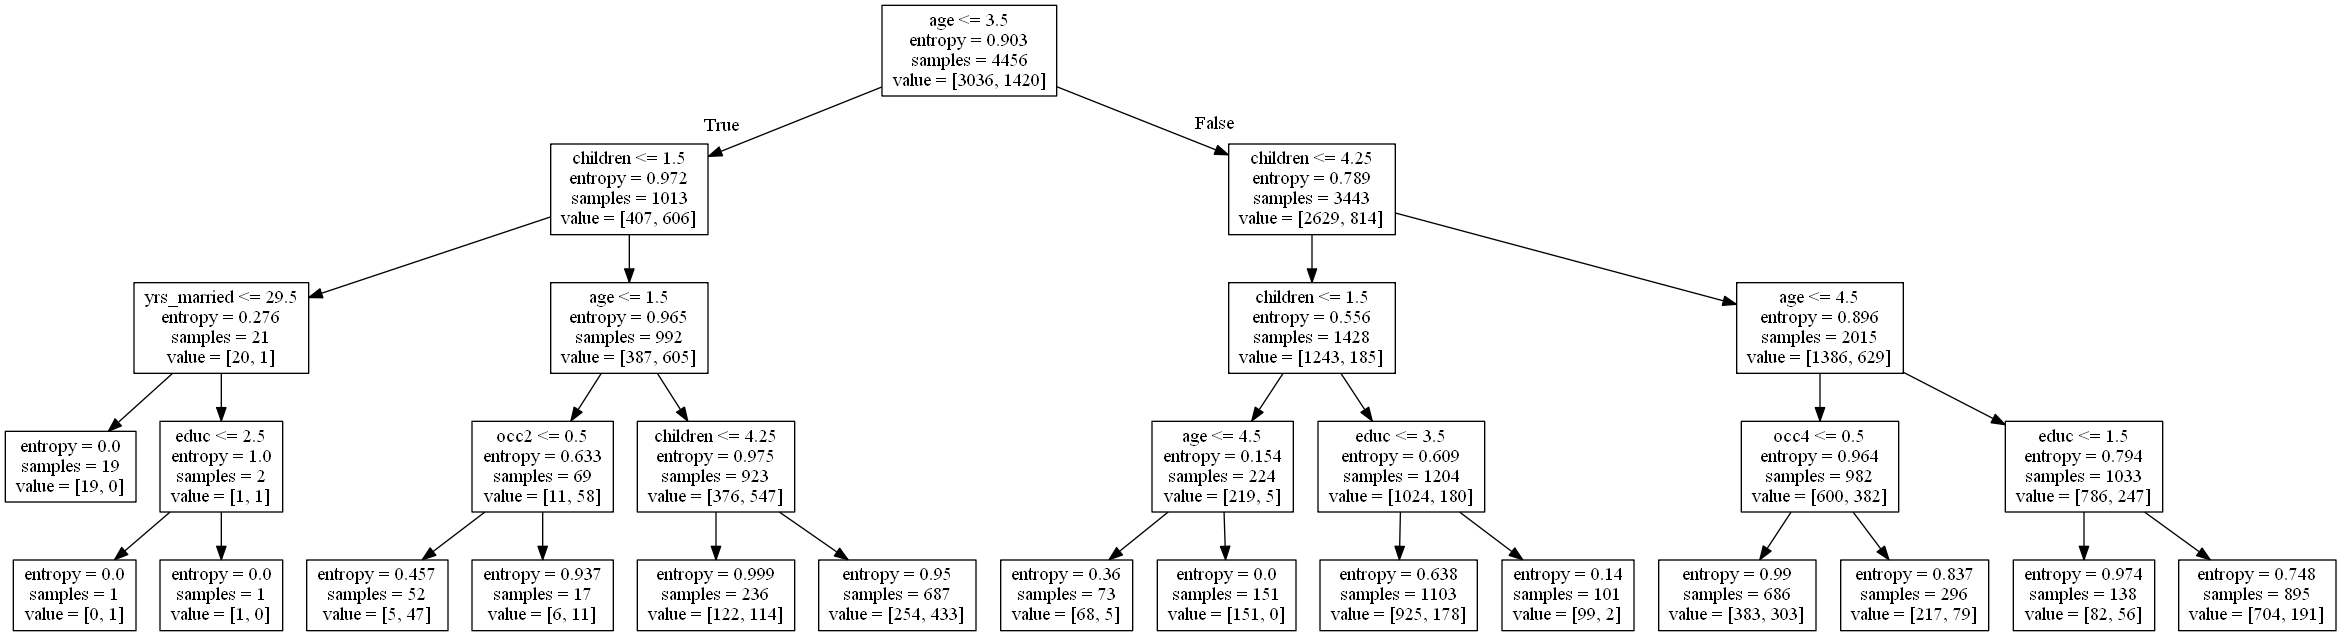

In [27]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

In [23]:
# Hint 
# model1 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model1.fit(X_train, y_train)
# model2 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model2.fit(X_train, y_train)
# model3 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model3.fit(X_train, y_train)
# Then display all 3 trees
# 

#dot_data = StringIO()  
#export_graphviz(model1, out_file=dot_data, feature_names=features)
#graph = pydot.graph_from_dot_data(dot_data.getvalue())
#Image(graph[0].create_png())

In [28]:
# Create models
model1 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model1.fit(X_train, y_train)
model2 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model2.fit(X_train, y_train)
model3 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

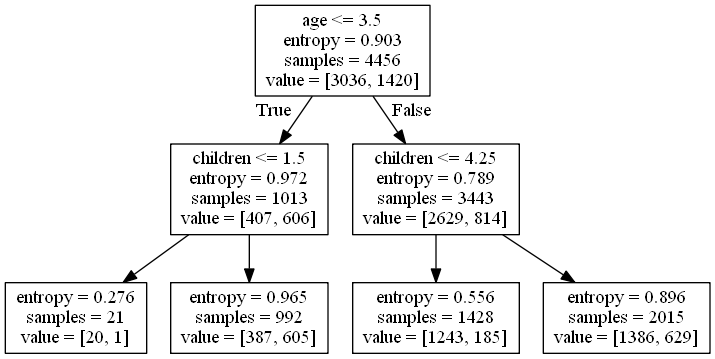

In [34]:
# Model 1
dot_data1 = StringIO()
export_graphviz(model1, out_file=dot_data, feature_names=features)
graph1 = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph1[0].create_png())

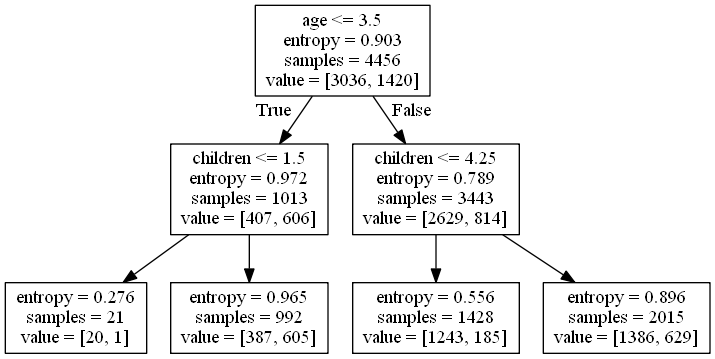

In [37]:
# Model 2
dot_data2 = StringIO()
export_graphviz(model2, out_file=dot_data, feature_names=features)
graph2 = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph2[0].create_png())

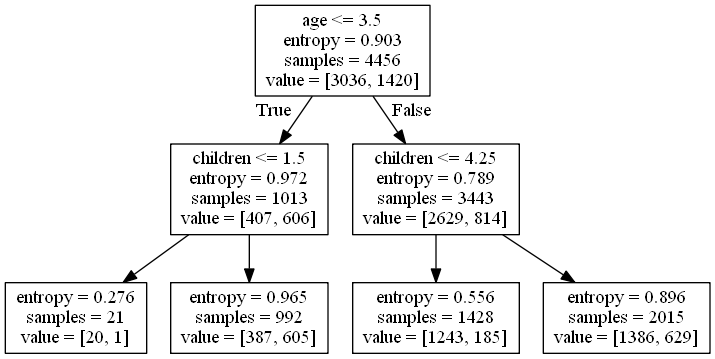

In [38]:
# Model 3
dot_data3 = StringIO()
export_graphviz(model3, out_file=dot_data, feature_names=features)
graph3 = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph3[0].create_png())

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      1277
           1       0.59      0.29      0.39       633

    accuracy                           0.70      1910
   macro avg       0.66      0.60      0.60      1910
weighted avg       0.68      0.70      0.67      1910

0.6994764397905759
